<a href="https://colab.research.google.com/github/kiannylim/SC1015-Data-Science-Project/blob/main/MachineLearningModel_(Non_resampled).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

## Data Management

Get Data from cleanedDataset.csv

In [2]:
data = pd.read_csv("cleanedDataset.csv")

In [3]:
#Label Encoding (turning categorical to numerical)
cat_cols=[]
for i in data.columns:
    if data[i].nunique() <= 5 or data[i].dtype == object:
        cat_cols.append(i)
norm_df=data.copy()

# Converting cols to category
for i in data[cat_cols]:
        data[i] = pd.Categorical(data[i])
        data[i] = data[i].cat.codes

We could not use our categorical data in our forest so we had to use label encoding to covert our categorical data to numerical data. Label encoding assigns every level of the categorical data with a number so that it can be used as a numerical data in our decision tree and forest.


In [4]:
attritioned = data['Attrition']
data = data.drop(columns=["Attrition"])
data = data.drop(columns=["Unnamed: 0"])

In [5]:
attritioned.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int8

In [6]:
data.head()

,Age,BusinessTravel,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,2,1,1,2,7,3,2,8,1,8,0,6,4,5
1,49,1,1,2,1,6,1,1,1,0,10,3,10,7,7
2,37,2,4,3,1,2,2,2,6,1,7,3,0,0,0
3,33,1,1,3,2,6,2,1,1,1,8,3,8,7,0
4,27,2,3,0,2,2,1,1,9,0,6,3,2,2,2


## Multi-Variate Classification Tree


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[list(data)], attritioned, test_size = 0.20)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1176, 15) (1176,)
Test Set  : (294, 15) (294,)


[Text(0.4260204081632653, 0.9166666666666666, 'OverTime <= 0.5\ngini = 0.274\nsamples = 1176\nvalue = [983, 193]\nclass = No'),
 Text(0.16326530612244897, 0.75, 'TotalWorkingYears <= 2.5\ngini = 0.187\nsamples = 834\nvalue = [747, 87]\nclass = No'),
 Text(0.061224489795918366, 0.5833333333333334, 'Age <= 32.5\ngini = 0.438\nsamples = 68\nvalue = [46, 22]\nclass = No'),
 Text(0.04081632653061224, 0.4166666666666667, 'JobInvolvement <= 0.5\ngini = 0.477\nsamples = 56\nvalue = [34, 22]\nclass = No'),
 Text(0.02040816326530612, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.061224489795918366, 0.25, 'JobRole <= 4.0\ngini = 0.46\nsamples = 53\nvalue = [34, 19]\nclass = No'),
 Text(0.04081632653061224, 0.08333333333333333, 'gini = 0.499\nsamples = 21\nvalue = [10, 11]\nclass = Yes'),
 Text(0.08163265306122448, 0.08333333333333333, 'gini = 0.375\nsamples = 32\nvalue = [24, 8]\nclass = No'),
 Text(0.08163265306122448, 0.4166666666666667, 'gini = 0.0\nsamples = 12\nvalue

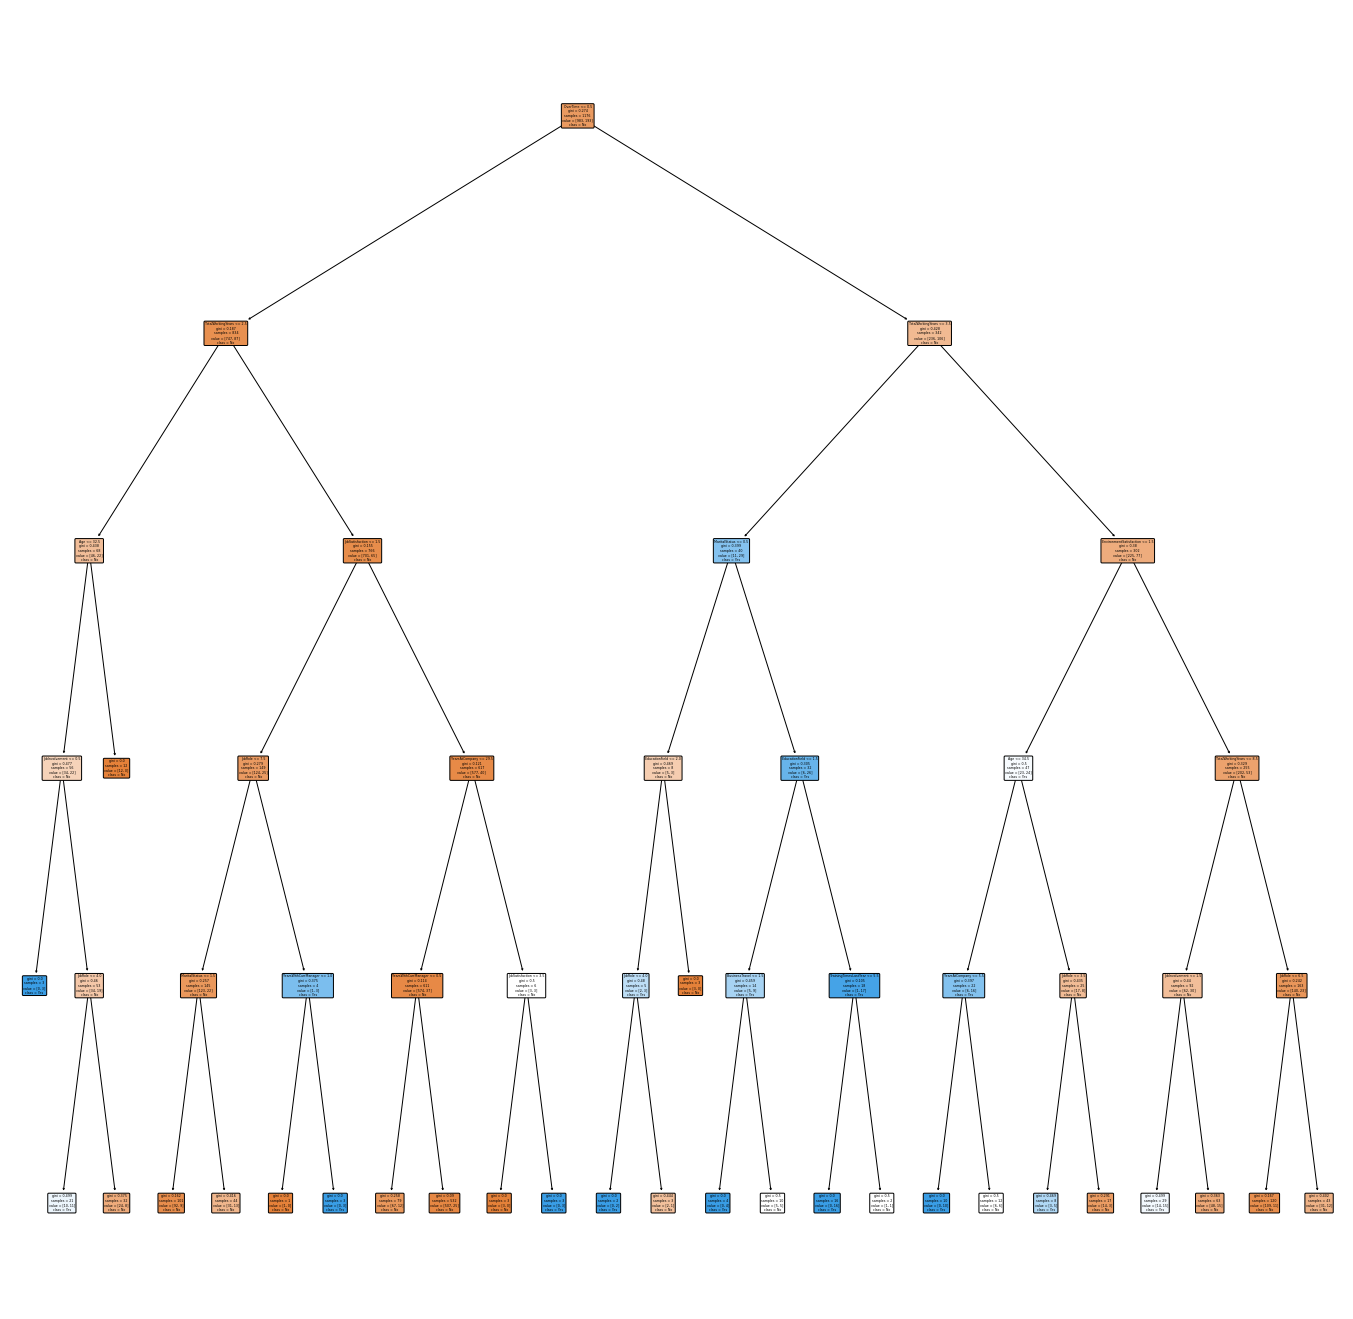

In [ ]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No","Yes"])

Train Data
Accuracy  :	 0.8741496598639455

TPR Train :	 0.37305699481865284
TNR Train :	 0.9725330620549338

FPR Train :	 0.027466937945066123
FNR Train :	 0.6269430051813472


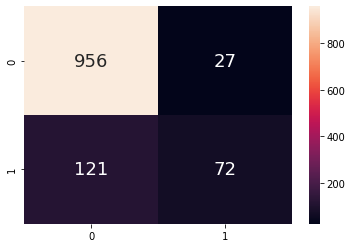

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8537414965986394

TPR Test :	 0.2727272727272727
TNR Test :	 0.956

FPR Test :	 0.044
FNR Test :	 0.7272727272727273


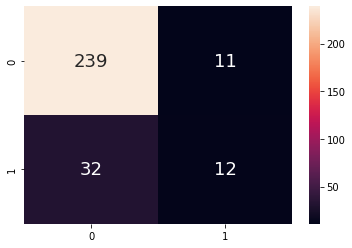

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Random Forest Classifier

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, attritioned, test_size = 0.30)

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, max_depth=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

Train Data
Accuracy  :	 0.8746355685131195

TPR Train :	 0.2
TNR Train :	 0.998849252013809

FPR Train :	 0.0011507479861910242
FNR Train :	 0.8


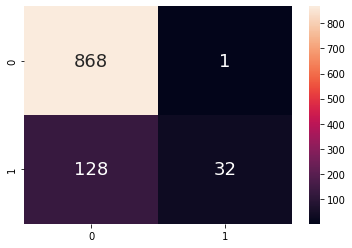

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = clf.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", clf.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8458049886621315

TPR Train :	 0.15584415584415584
TNR Train :	 0.9917582417582418

FPR Train :	 0.008241758241758242
FNR Train :	 0.8441558441558441


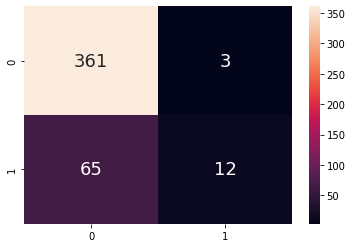

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = clf.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", clf.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### CrossValidation with GridSearch

We might have encountered overfitting or underfitting, when using the classic random forest, with no sense of what parameters to fit it on. Thus, we employed 
cross validation which splits our dataset into random groups, holding one group out as the test, and training the model on the remaining groups. This process is repeated for each group being held as the test group, then the average of the models is used for the resulting model.

Sklearn’s GridSearchCV, which will allow us to pass our specific estimator, our grid of parameters, and our chosen number of cross validation folds, into the cross validation model.

In [8]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [ ]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(x_train, y_train)

In [ ]:
rf_cv.best_params_

In [ ]:
#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=300, max_depth=8, criterion = "entropy", max_features = 'sqrt', random_state = 18)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=300, random_state=18)

Train Data
Accuracy  :	 0.9212827988338192

TPR Train :	 0.49375
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.50625


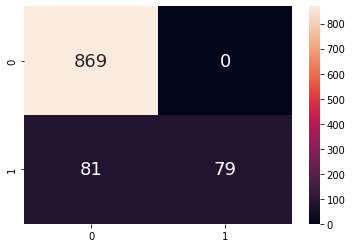

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = clf2.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", clf2.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8503401360544217

TPR Train :	 0.19480519480519481
TNR Train :	 0.989010989010989

FPR Train :	 0.01098901098901099
FNR Train :	 0.8051948051948052


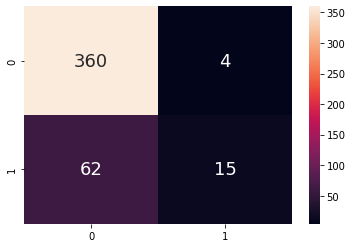

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = clf2.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", clf2.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})